In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("./full_data.csv")

In [3]:
df = df.drop(columns=["filename"])

# Down Sampling:

In [ ]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]
value_counts = df['kelas'].value_counts()
total_count = df.shape[0]
class_counts = []
for i in value_counts:
    class_counts.append(i)
excludeColumn = value_counts.idxmin()
columnSaved = value_counts[value_counts.index!=excludeColumn].index
minorityClass = df[df.kelas == excludeColumn].index
selected_examples = []
for col in columnSaved:
  major = df[df.kelas == col].index
  num_examples = min(class_counts)
  
  # Loop through each class
  class_examples = np.random.choice(major, size=num_examples, replace=False)
    
    # Add the selected examples to the list
  selected_examples.extend(class_examples)
  print("Total of",col,":",len(class_examples))
undersampleIndices = np.concatenate([minorityClass,selected_examples])
df = df.loc[undersampleIndices]

Total of FNSZ : 230
Total of GNSZ : 230


In [ ]:
df.kelas.value_counts()

CPSZ    230
FNSZ    230
GNSZ    230
Name: kelas, dtype: int64

# Tanpa downsampling:

In [4]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]

# Label Encoding: 

In [5]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['kelas']= label_encoder.fit_transform(df['kelas'])
le_name_mapping = dict(zip(label_encoder.classes_, 
                            label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

df['kelas'].unique()

{'CPSZ': 0, 'FNSZ': 1, 'GNSZ': 2}


array([1, 2, 0])

In [6]:
y = df['kelas']
x = df.drop(columns='kelas') #siapkan x dan y

# Over sampling:

In [7]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

# data splitting:

In [8]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = 0)

# KNN:

## Euclidean:

In [9]:
def euclidean_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='euclidean').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

        CPSZ       0.85      0.88      0.86       184
        FNSZ       0.87      0.82      0.84       197
        GNSZ       0.86      0.89      0.88       178

    accuracy                           0.86       559
   macro avg       0.86      0.86      0.86       559
weighted avg       0.86      0.86      0.86       559



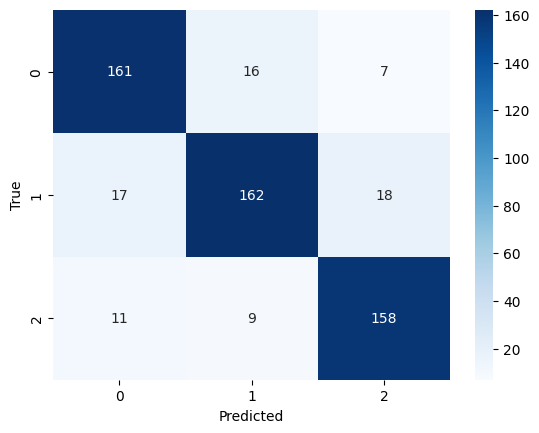


Nilai n =  3
Accuracy: 0.738819320214669
              precision    recall  f1-score   support

        CPSZ       0.70      0.83      0.76       184
        FNSZ       0.78      0.57      0.66       197
        GNSZ       0.75      0.83      0.79       178

    accuracy                           0.74       559
   macro avg       0.74      0.74      0.74       559
weighted avg       0.74      0.74      0.73       559



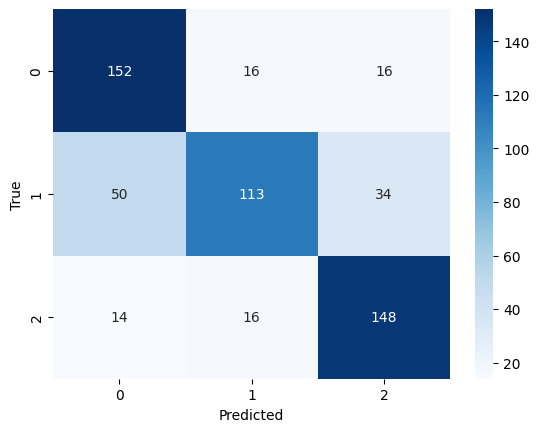


Nilai n =  5
Accuracy: 0.6976744186046512
              precision    recall  f1-score   support

        CPSZ       0.70      0.84      0.76       184
        FNSZ       0.71      0.51      0.59       197
        GNSZ       0.69      0.75      0.72       178

    accuracy                           0.70       559
   macro avg       0.70      0.70      0.69       559
weighted avg       0.70      0.70      0.69       559



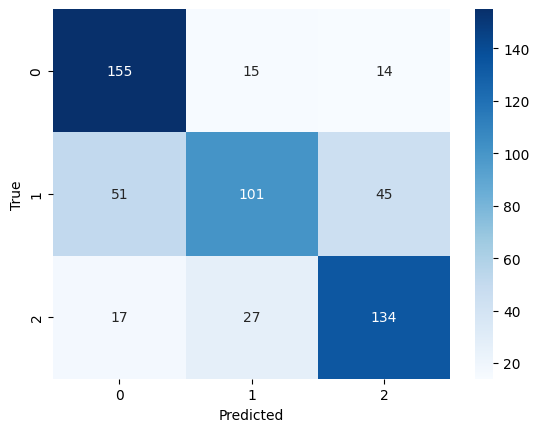


Nilai n =  7
Accuracy: 0.6618962432915921
              precision    recall  f1-score   support

        CPSZ       0.67      0.78      0.72       184
        FNSZ       0.66      0.46      0.54       197
        GNSZ       0.66      0.76      0.71       178

    accuracy                           0.66       559
   macro avg       0.66      0.67      0.66       559
weighted avg       0.66      0.66      0.65       559



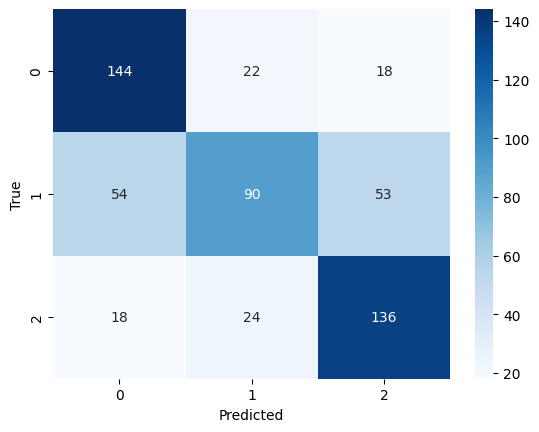


Nilai n =  9
Accuracy: 0.6386404293381037
              precision    recall  f1-score   support

        CPSZ       0.63      0.73      0.68       184
        FNSZ       0.65      0.46      0.54       197
        GNSZ       0.64      0.74      0.69       178

    accuracy                           0.64       559
   macro avg       0.64      0.64      0.63       559
weighted avg       0.64      0.64      0.63       559



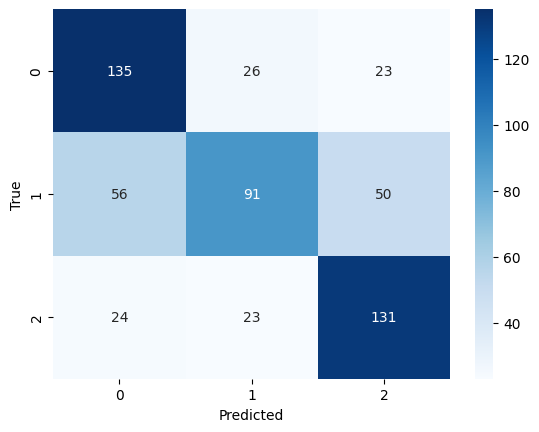

In [10]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = euclidean_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Cosine:

In [11]:
def cosine_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='cosine').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.7084078711985689
              precision    recall  f1-score   support

        CPSZ       0.69      0.67      0.68       184
        FNSZ       0.72      0.74      0.73       197
        GNSZ       0.72      0.71      0.71       178

    accuracy                           0.71       559
   macro avg       0.71      0.71      0.71       559
weighted avg       0.71      0.71      0.71       559



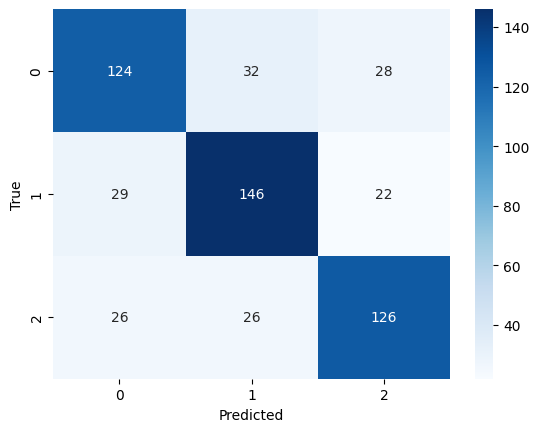


Nilai n =  3
Accuracy: 0.5509838998211091
              precision    recall  f1-score   support

        CPSZ       0.56      0.62      0.59       184
        FNSZ       0.51      0.40      0.45       197
        GNSZ       0.57      0.65      0.61       178

    accuracy                           0.55       559
   macro avg       0.55      0.56      0.55       559
weighted avg       0.55      0.55      0.54       559



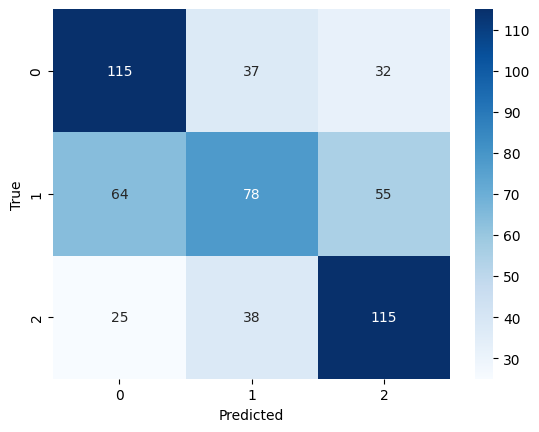


Nilai n =  5
Accuracy: 0.5617173524150268
              precision    recall  f1-score   support

        CPSZ       0.55      0.65      0.60       184
        FNSZ       0.58      0.46      0.51       197
        GNSZ       0.56      0.58      0.57       178

    accuracy                           0.56       559
   macro avg       0.56      0.56      0.56       559
weighted avg       0.56      0.56      0.56       559



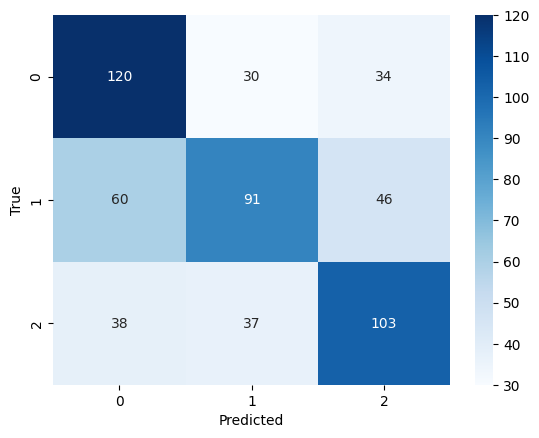


Nilai n =  7
Accuracy: 0.5384615384615384
              precision    recall  f1-score   support

        CPSZ       0.56      0.60      0.58       184
        FNSZ       0.54      0.42      0.47       197
        GNSZ       0.52      0.60      0.56       178

    accuracy                           0.54       559
   macro avg       0.54      0.54      0.54       559
weighted avg       0.54      0.54      0.53       559



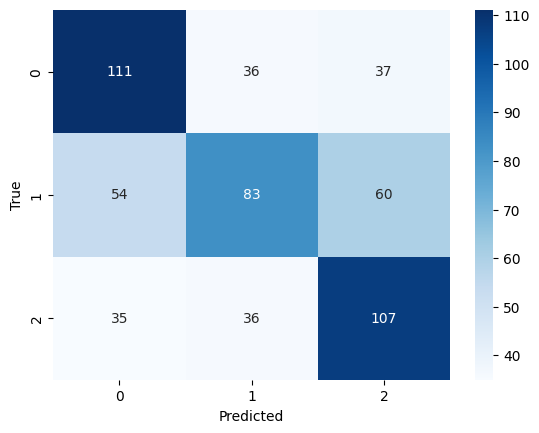


Nilai n =  9
Accuracy: 0.5044722719141324
              precision    recall  f1-score   support

        CPSZ       0.51      0.58      0.54       184
        FNSZ       0.55      0.39      0.46       197
        GNSZ       0.47      0.55      0.51       178

    accuracy                           0.50       559
   macro avg       0.51      0.51      0.50       559
weighted avg       0.51      0.50      0.50       559



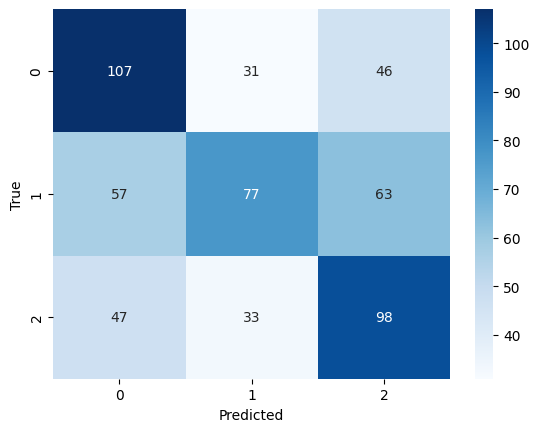

In [12]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = cosine_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Cityblock:

In [13]:
def cityblock_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='cityblock').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.8586762075134168
              precision    recall  f1-score   support

        CPSZ       0.85      0.88      0.86       184
        FNSZ       0.86      0.83      0.85       197
        GNSZ       0.87      0.87      0.87       178

    accuracy                           0.86       559
   macro avg       0.86      0.86      0.86       559
weighted avg       0.86      0.86      0.86       559



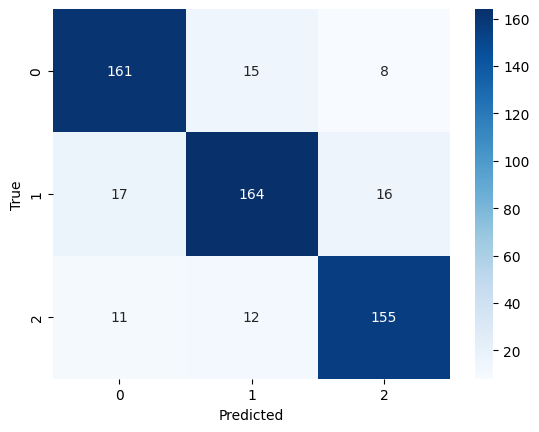


Nilai n =  3
Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

        CPSZ       0.70      0.82      0.75       184
        FNSZ       0.79      0.58      0.67       197
        GNSZ       0.76      0.85      0.80       178

    accuracy                           0.74       559
   macro avg       0.75      0.75      0.74       559
weighted avg       0.75      0.74      0.74       559



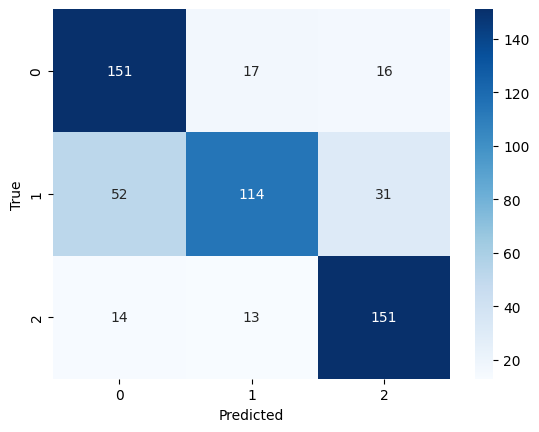


Nilai n =  5
Accuracy: 0.6940966010733453
              precision    recall  f1-score   support

        CPSZ       0.69      0.83      0.76       184
        FNSZ       0.70      0.51      0.59       197
        GNSZ       0.69      0.76      0.72       178

    accuracy                           0.69       559
   macro avg       0.70      0.70      0.69       559
weighted avg       0.70      0.69      0.69       559



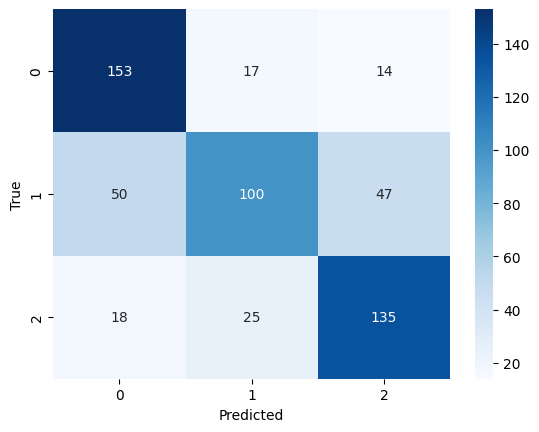


Nilai n =  7
Accuracy: 0.6493738819320215
              precision    recall  f1-score   support

        CPSZ       0.66      0.77      0.71       184
        FNSZ       0.64      0.45      0.53       197
        GNSZ       0.64      0.75      0.69       178

    accuracy                           0.65       559
   macro avg       0.65      0.66      0.64       559
weighted avg       0.65      0.65      0.64       559



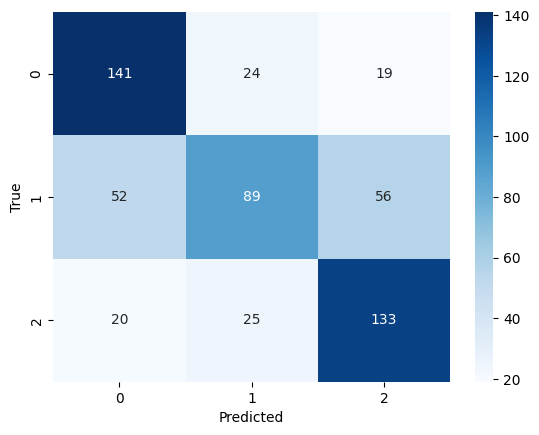


Nilai n =  9
Accuracy: 0.6511627906976745
              precision    recall  f1-score   support

        CPSZ       0.65      0.74      0.69       184
        FNSZ       0.64      0.48      0.55       197
        GNSZ       0.66      0.75      0.70       178

    accuracy                           0.65       559
   macro avg       0.65      0.66      0.65       559
weighted avg       0.65      0.65      0.64       559



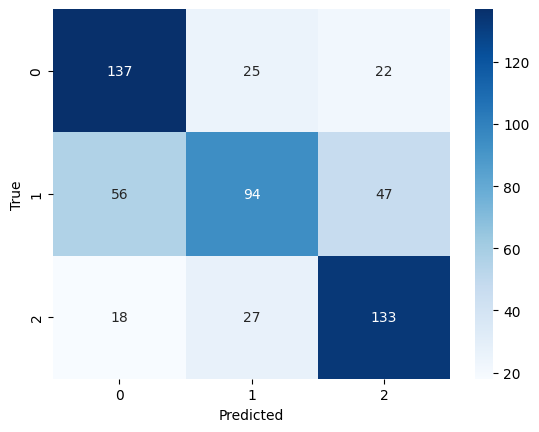

In [14]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = cityblock_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Minkowski:

In [15]:
def minkowski_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='minkowski').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

        CPSZ       0.85      0.88      0.86       184
        FNSZ       0.87      0.82      0.84       197
        GNSZ       0.86      0.89      0.88       178

    accuracy                           0.86       559
   macro avg       0.86      0.86      0.86       559
weighted avg       0.86      0.86      0.86       559



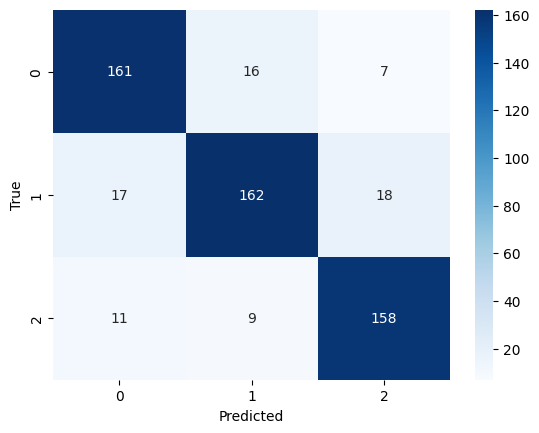


Nilai n =  3
Accuracy: 0.738819320214669
              precision    recall  f1-score   support

        CPSZ       0.70      0.83      0.76       184
        FNSZ       0.78      0.57      0.66       197
        GNSZ       0.75      0.83      0.79       178

    accuracy                           0.74       559
   macro avg       0.74      0.74      0.74       559
weighted avg       0.74      0.74      0.73       559



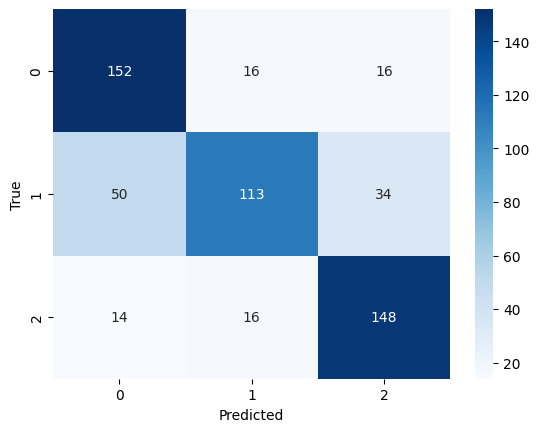


Nilai n =  5
Accuracy: 0.6976744186046512
              precision    recall  f1-score   support

        CPSZ       0.70      0.84      0.76       184
        FNSZ       0.71      0.51      0.59       197
        GNSZ       0.69      0.75      0.72       178

    accuracy                           0.70       559
   macro avg       0.70      0.70      0.69       559
weighted avg       0.70      0.70      0.69       559



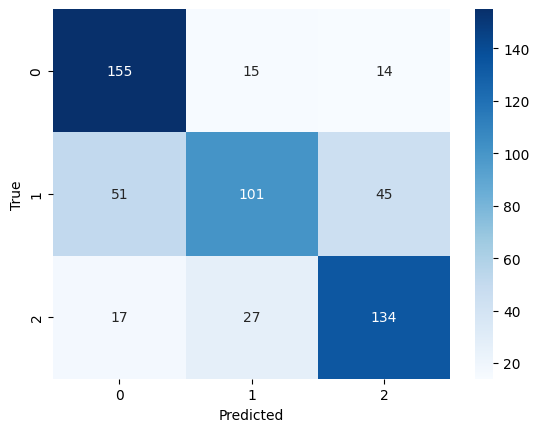


Nilai n =  7
Accuracy: 0.6618962432915921
              precision    recall  f1-score   support

        CPSZ       0.67      0.78      0.72       184
        FNSZ       0.66      0.46      0.54       197
        GNSZ       0.66      0.76      0.71       178

    accuracy                           0.66       559
   macro avg       0.66      0.67      0.66       559
weighted avg       0.66      0.66      0.65       559



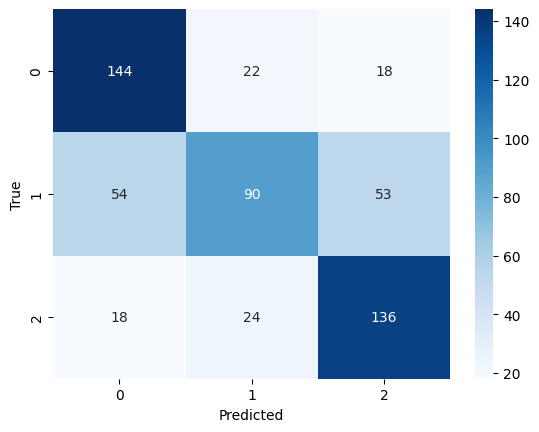


Nilai n =  9
Accuracy: 0.6386404293381037
              precision    recall  f1-score   support

        CPSZ       0.63      0.73      0.68       184
        FNSZ       0.65      0.46      0.54       197
        GNSZ       0.64      0.74      0.69       178

    accuracy                           0.64       559
   macro avg       0.64      0.64      0.63       559
weighted avg       0.64      0.64      0.63       559



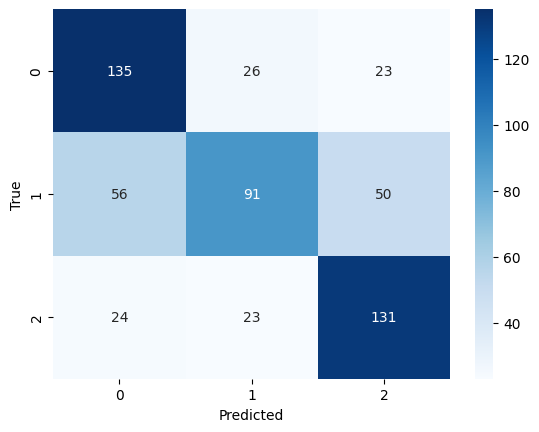

In [16]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = minkowski_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Correlation:

In [17]:
def correlation_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  import scipy
  knn = KNeighborsClassifier(n_neighbors = n, 
                        metric='correlation').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.3112701252236136
              precision    recall  f1-score   support

        CPSZ       0.31      0.10      0.15       184
        FNSZ       0.22      0.04      0.06       197
        GNSZ       0.32      0.84      0.46       178

    accuracy                           0.31       559
   macro avg       0.28      0.32      0.22       559
weighted avg       0.28      0.31      0.22       559



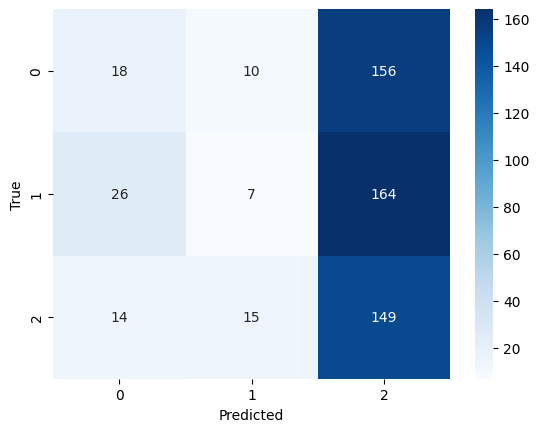


Nilai n =  3
Accuracy: 0.3184257602862254
              precision    recall  f1-score   support

        CPSZ       0.33      0.64      0.44       184
        FNSZ       0.00      0.00      0.00       197
        GNSZ       0.30      0.34      0.32       178

    accuracy                           0.32       559
   macro avg       0.21      0.33      0.25       559
weighted avg       0.20      0.32      0.24       559



/Users/iganarendra/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/iganarendra/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/iganarendra/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


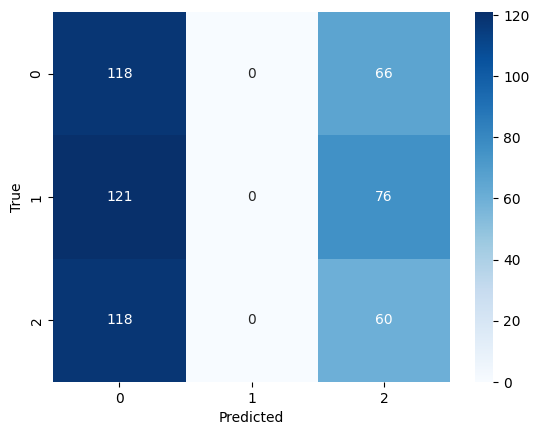


Nilai n =  5
Accuracy: 0.3416815742397138
              precision    recall  f1-score   support

        CPSZ       0.36      0.54      0.43       184
        FNSZ       0.36      0.34      0.35       197
        GNSZ       0.26      0.15      0.19       178

    accuracy                           0.34       559
   macro avg       0.33      0.34      0.32       559
weighted avg       0.33      0.34      0.32       559



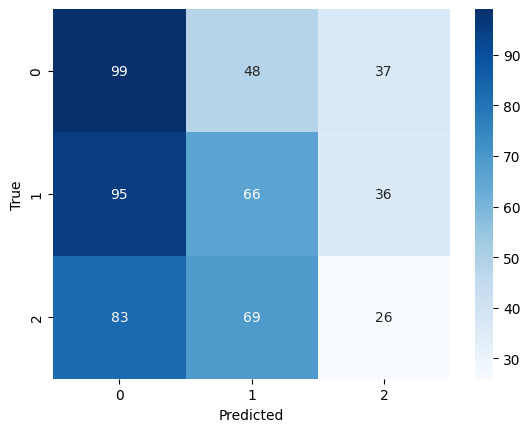


Nilai n =  7
Accuracy: 0.35062611806797855
              precision    recall  f1-score   support

        CPSZ       0.36      0.47      0.41       184
        FNSZ       0.36      0.36      0.36       197
        GNSZ       0.32      0.21      0.26       178

    accuracy                           0.35       559
   macro avg       0.35      0.35      0.34       559
weighted avg       0.35      0.35      0.34       559



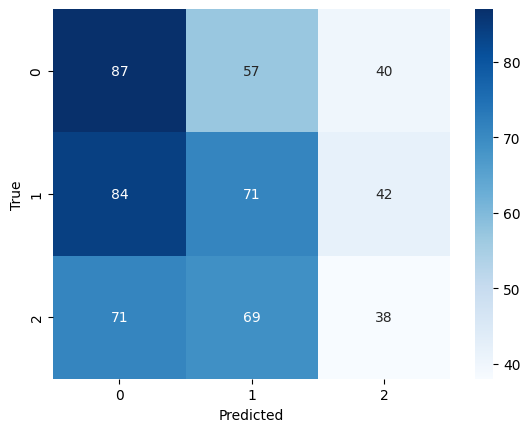


Nilai n =  9
Accuracy: 0.38640429338103754
              precision    recall  f1-score   support

        CPSZ       0.36      0.53      0.43       184
        FNSZ       0.42      0.39      0.40       197
        GNSZ       0.39      0.24      0.30       178

    accuracy                           0.39       559
   macro avg       0.39      0.38      0.38       559
weighted avg       0.39      0.39      0.38       559



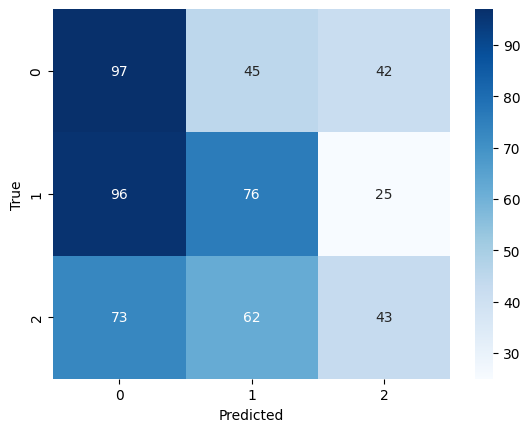

In [18]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = correlation_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()